In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import random

In [37]:
DIRECTORY = r"/Users/anisurrahman/Documents/ML/Deep Learning/CNN/Covid/train"
TEST = r"/Users/anisurrahman/Documents/ML/Deep Learning/CNN/Covid/test"

CATEGORIES = ["Covid","Normal","Viral Pneumonia"]

data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
#     print(folder)
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(100,100))
#         plt.imshow(img_arr)
#         print(img_arr)
        data.append([img_arr,label])

len(data)

251

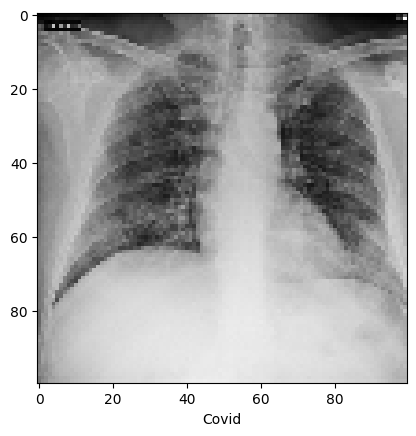

In [7]:
def get_label(index):
    if index == 0:
        return "Covid"
    if index == 1:
        return "Normal"
    if index == 2:
        return "Viral Pneumonia"
    
def show_pic(index): 
    plt.imshow(data[index][0])
    plt.xlabel(get_label(data[index][1]))
    plt.show()
    
show_pic(1)



In [8]:
random.shuffle(data)
# show_pic(2)

In [9]:
X = []
Y = []

for features, label in data:
    X.append(features)   
    Y.append(label)
    
    
X = np.asarray(X)
Y = np.asarray(Y)

X = X / 255
X.shape[1:]

(100, 100, 3)

In [10]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

#pre=processing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

test_datagen = test_datagen.flow_from_directory(
    TEST,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 226 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [11]:
train_datagen.class_indices


{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [26]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential()
model.add(Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen,epochs=15,validation_data=test_datagen)

Epoch 1/15


2024-10-06 21:12:24.889767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - ETA: 0s - loss: 1.1590 - accuracy: 0.3628

2024-10-06 21:12:33.862703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 9s 2s/step - loss: 1.1590 - accuracy: 0.3628 - val_loss: 1.0806 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 9s 2s/step - loss: 0.9946 - accuracy: 0.6372 - val_loss: 0.9691 - val_accuracy: 0.3333
Epoch 3/15
4/4 [==============================] - 8s 2s/step - loss: 0.9163 - accuracy: 0.6991 - val_loss: 0.8357 - val_accuracy: 0.6667
Epoch 4/15
4/4 [==============================] - 9s 2s/step - loss: 0.7487 - accuracy: 0.7699 - val_loss: 0.7117 - val_accuracy: 0.6667
Epoch 5/15
4/4 [==============================] - 8s 2s/step - loss: 0.6216 - accuracy: 0.8053 - val_loss: 0.5328 - val_accuracy: 0.8333
Epoch 6/15
4/4 [==============================] - 8s 2s/step - loss: 0.5737 - accuracy: 0.7611 - val_loss: 0.4578 - val_accuracy: 0.8333
Epoch 7/15
4/4 [==============================] - 8s 2s/step - loss: 0.4996 - accuracy: 0.7611 - val_loss: 0.5615 - val_accuracy: 0.6667
Epoch 8/15
4/4 [==============================] - 8s

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [29]:
from tensorflow.keras.models import Model
a = np.array(history.history['accuracy']).mean()
# history.history
model.evaluate_generator(generator=test_datagen)

/var/folders/y2/pbbl1rcd3kj9crfctyw4fgy80000gn/T/ipykernel_41219/731998689.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=test_datagen)
2024-10-06 21:14:44.915956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[0.369602769613266, 0.8333333134651184]

In [30]:
from keras.preprocessing import image
path = "/Users/anisurrahman/Documents/ML/Deep Learning/CNN/Covid/net"
# path = "/home/user/ML/Deep Learning/CNN/Covid/test/Normal"
img = path + "/PN.jpeg"
try:
    
    img_pred = tf.keras.utils.load_img(img,target_size=(IMAGE_SIZE,IMAGE_SIZE))
    img_pred = tf.keras.utils.img_to_array(img_pred)
    img_pred = img_pred / 255
    img_pred = np.expand_dims(img_pred, axis=0)
except:
    print("file not found!")

result = model.predict(img_pred)
# plt.imshow(img_pred)
print(result)
# print(get_label(np.argmax(result)))
print(CATEGORIES[np.argmax(result)])

1/1 [==============================] - 0s 35ms/step
[[0.00140338 0.06039159 0.93820506]]
Viral Pneumonia


In [34]:
path = "covid_normal_pneumoia_cnn.h5"
model.save(path)

In [35]:
from tensorflow.keras.models import load_model

# Load the model from the local file
loaded_model = load_model(path)

In [36]:
from keras.preprocessing import image
path = "/Users/anisurrahman/Documents/ML/Deep Learning/CNN/Covid/net"
# path = "/home/user/ML/Deep Learning/CNN/Covid/test/Normal"
img = path + "/PN.jpeg"
try:
    
    img_pred = tf.keras.utils.load_img(img,target_size=(IMAGE_SIZE,IMAGE_SIZE))
    img_pred = tf.keras.utils.img_to_array(img_pred)
    img_pred = img_pred / 255
    img_pred = np.expand_dims(img_pred, axis=0)
except:
    print("file not found!")

result = loaded_model.predict(img_pred)
# plt.imshow(img_pred)
print(result)
# print(get_label(np.argmax(result)))
print(CATEGORIES[np.argmax(result)])

1/1 [==============================] - 0s 34ms/step
[[0.00140338 0.06039159 0.93820506]]
Viral Pneumonia
